# Nettoyage

## Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

In [3]:
dataset = pd.read_csv('dataset.csv', nrows=1000)

In [4]:
dataset.head()

,id_stat,nom_region,nom_espece,date_plantation,superficie,pluviometrie,temperature_min,temperature_max,taux_survie_plants,rendement_moyen,annee
0,1,Abidjan,Cacao,2023-04-26,311.35,221.88,23.68,27.66,81.44,9.40,2019
1,1,Abidjan,Cacao,2023-08-20,141.35,221.88,23.68,27.66,81.44,9.40,2019
2,1,Abidjan,Cacao,2024-03-27,301.74,221.88,23.68,27.66,81.44,9.40,2019
3,2,Abidjan,Café,2019-06-26,114.35,92.11,23.94,34.81,75.21,6.29,2019
4,2,Abidjan,Café,2019-12-01,253.65,92.11,23.94,34.81,75.21,6.29,2019


Ajout de nouvelle colonne

In [5]:
# Convertir la colonne 'date' en type datetime
dataset['date_plantation'] = pd.to_datetime(dataset['date_plantation'], errors='coerce')  # Gestion des erreurs pour les dates non valides

# Ajouter la colonne température moyenne
dataset['temperature_moyenne'] = (dataset['temperature_min'] + dataset['temperature_max']) / 2

# Ajouter la colonne mois de plantation
dataset['mois_plantation'] = dataset['date_plantation'].dt.month

# Afficher les premières lignes du dataset enrichi
dataset.head()

,id_stat,nom_region,nom_espece,date_plantation,superficie,pluviometrie,temperature_min,temperature_max,taux_survie_plants,rendement_moyen,annee,temperature_moyenne,mois_plantation
0,1,Abidjan,Cacao,2023-04-26,311.35,221.88,23.68,27.66,81.44,9.40,2019,25.670,4
1,1,Abidjan,Cacao,2023-08-20,141.35,221.88,23.68,27.66,81.44,9.40,2019,25.670,8
2,1,Abidjan,Cacao,2024-03-27,301.74,221.88,23.68,27.66,81.44,9.40,2019,25.670,3
3,2,Abidjan,Café,2019-06-26,114.35,92.11,23.94,34.81,75.21,6.29,2019,29.375,6
4,2,Abidjan,Café,2019-12-01,253.65,92.11,23.94,34.81,75.21,6.29,2019,29.375,12


Analyses et Visualisation


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

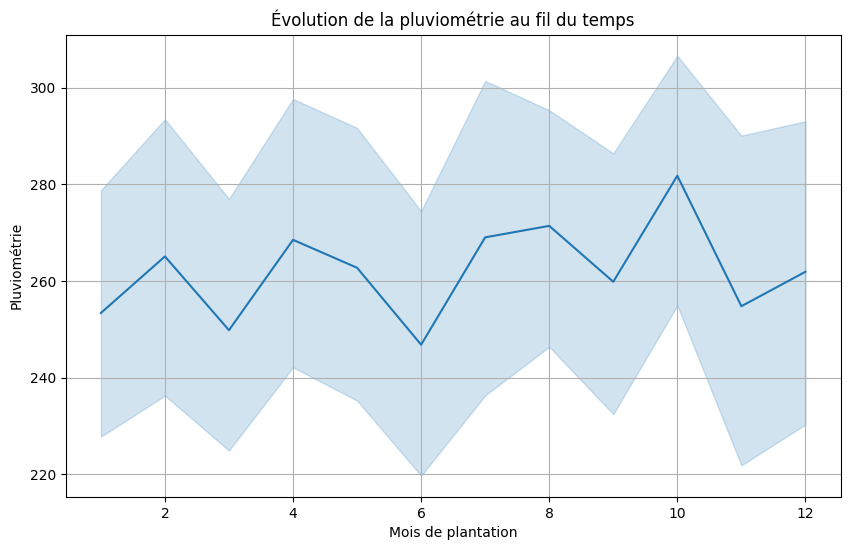

In [7]:
# Pluviométrie au fil du temps
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x='mois_plantation', y='pluviometrie')
plt.title("Évolution de la pluviométrie au fil du temps")
plt.xlabel("Mois de plantation")
plt.ylabel("Pluviométrie")
plt.grid(True)
plt.show()

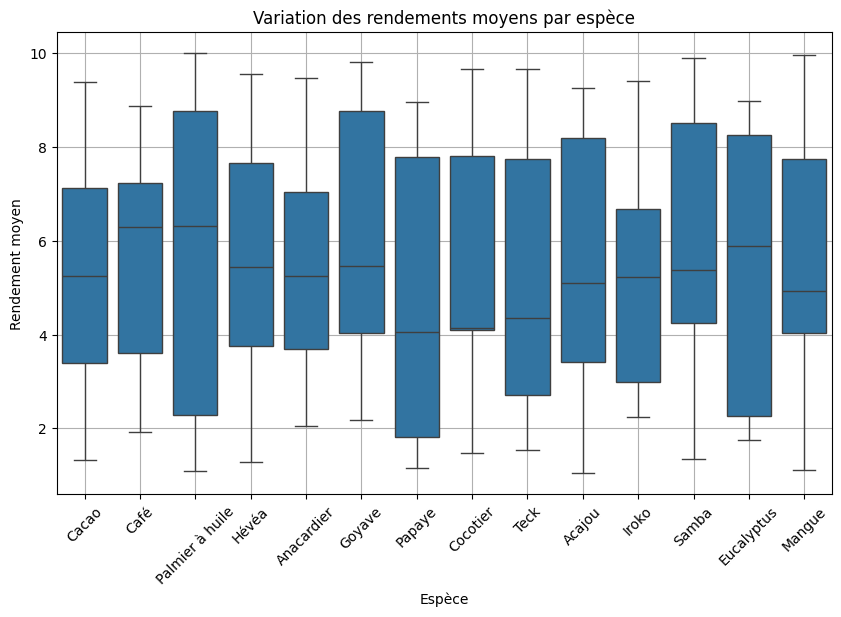

In [8]:
# Créer une nouvelle colonne 'année' à partir de la date
dataset['année'] = dataset['date_plantation'].dt.year

# Boxplot : Rendement moyen par espèce
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='nom_espece', y='rendement_moyen')
plt.title("Variation des rendements moyens par espèce")
plt.xlabel("Espèce")
plt.ylabel("Rendement moyen")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



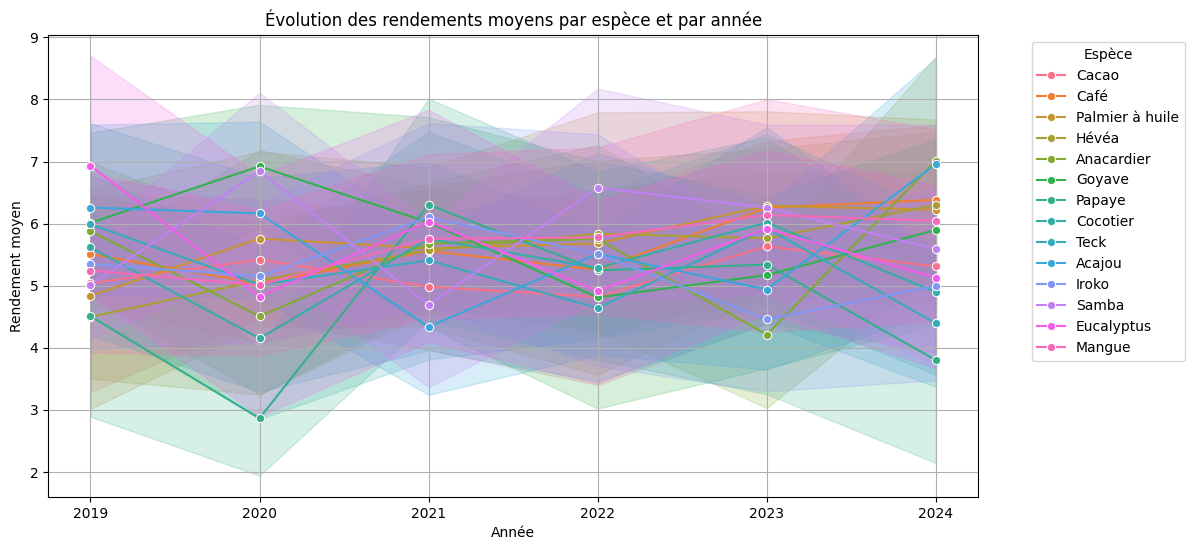

In [9]:
# Lineplot : Rendement moyen au fil des années pour chaque espèce
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='année', y='rendement_moyen', hue='nom_espece', marker="o")
plt.title("Évolution des rendements moyens par espèce et par année")
plt.xlabel("Année")
plt.ylabel("Rendement moyen")
plt.legend(title="Espèce", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()